17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 114s 554ms/step - accuracy: 0.5468 - loss: 0.6817 - val_accuracy: 0.5381 - val_loss: 0.6817
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 106s 541ms/step - accuracy: 0.6450 - loss: 0.6135 - val_accuracy: 0.7792 - val_loss: 0.5007
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 547ms/step - accuracy: 0.8160 - loss: 0.4499 - val_accuracy: 0.8172 - val_loss: 0.4610
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 143s 551ms/step - accuracy: 0.7396 - loss: 0.5247 - val_accuracy: 0.7950 - val_loss: 0.4960
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 139s 539ms/step - accuracy: 0.7929 - loss: 0.4906 - val_accuracy: 0.8134 - val_loss: 0.4635
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step


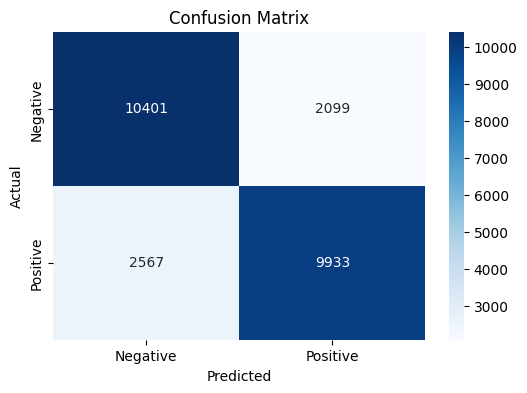

              precision    recall  f1-score   support

    Negative       0.80      0.83      0.82     12500
    Positive       0.83      0.79      0.81     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000



In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the IMDB dataset
num_words = 10000  # Vocabulary size
max_length = 200   # Max length of a review

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# Define the LSTM model
model = Sequential([
    Embedding(num_words, 128, input_length=max_length),
    LSTM(64, dropout=0.2, recurrent_dropout=0.2),
    Dense(1, activation='sigmoid')  # Binary classification (0: Negative, 1: Positive)
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# Evaluate model performance
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))
